# Probability Theory and Statistics

## Basic concepts

A **random variable** is a fundamental concept in probability and statistics. It represents a variable whose values are determined by the outcomes of a random phenomenon. A **discrete random variable** can take on a finite or countable number of distinct values. For example, the roll of a fair six-sided die is a discrete random variable, as it can result in one of six possible outcomes (1 through 6). The probability distribution of this random variable is uniform, meaning each outcome has an equal probability of occurring.

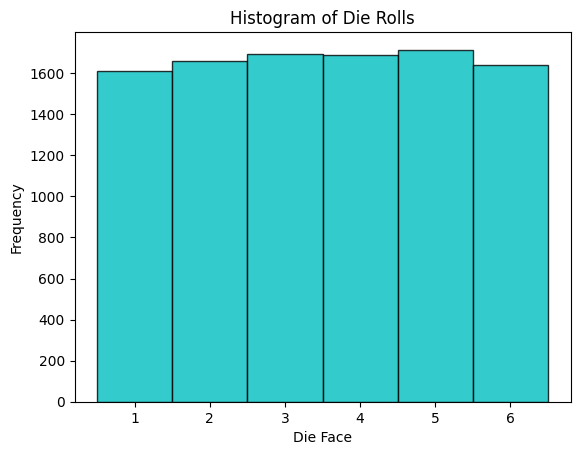

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate rolling a die 10000 times
rolls = np.random.randint(1, 7, size=10000)

# Plot the results
plt.hist(rolls, bins=np.arange(1, 8) - 0.5, edgecolor='k', color='c', alpha=.8)
plt.xticks(range(1, 7))
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Histogram of Die Rolls')
plt.show()

A **continuous random variable** can take any value within a given range. The normal distribution (or Gaussian distribution) is a common continuous distribution characterized by its bell-shaped curve. It is defined by its mean (expected value) and standard deviation (a measure of variability).

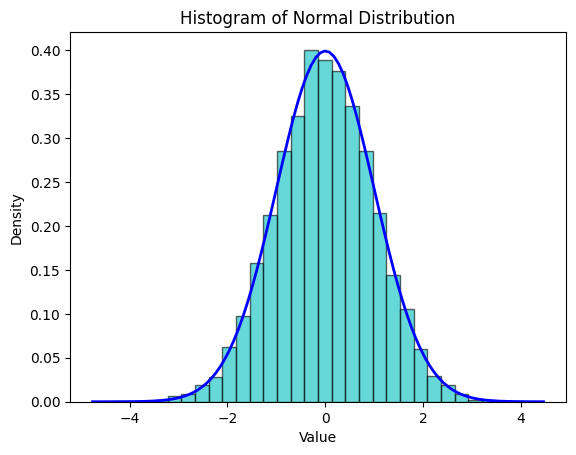

In [2]:
import scipy.stats as stats

# Generate data from a normal distribution
mean = 0
std_dev = 1
data = np.random.normal(mean, std_dev, 10000)

# Plot the results
plt.hist(data, bins=30, density=True, alpha=0.6, color='c', edgecolor='k')

# Plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'b', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Distribution')
plt.show()

A **random process** (or stochastic process) is a collection of random variables indexed by time or another variable, used to model systems that evolve randomly over time or space. A random process is a function that assigns a random variable to each point in a time or space domain (examples include stock market prices, weather patterns, and noise signals in electrical engineering). We can distinguish between discrete-time processes (whose indices are countable), and continuous-time processes (whose indices are an interval). We can also distinguish between stationary processes (whose statistical properties are constant over time), and nonstationary processes. 

A random walk is a simple example of a discrete-time random process, where each step is determined randomly, leading to a path that evolves over time.

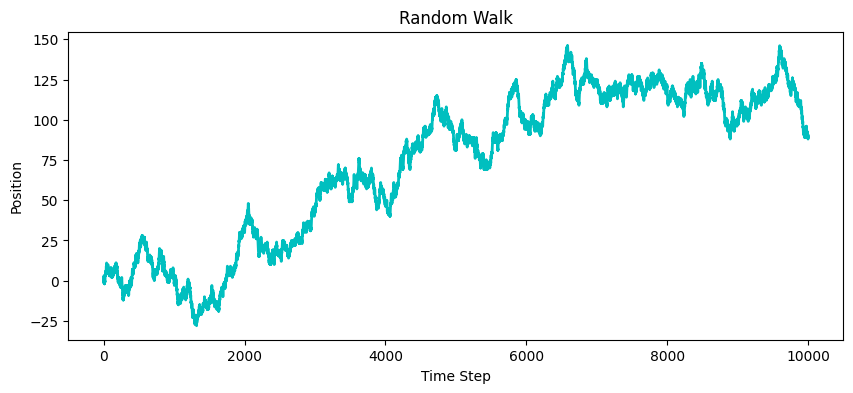

In [3]:
# Generate a random walk
n_steps = 10000
steps = np.random.choice([-1, 1], size=n_steps)
random_walk = np.cumsum(steps)

# Plot the random walk
plt.figure(figsize=(10, 4))
plt.plot(random_walk, c='c', lw=2)
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Random Walk')
plt.show()

**Statistical indepencence** refers to the lack of a relationship between two or more random variables. More formally, we can distinguish between two types of statistical independence:
1. **Marginal independence** refers to the lack of a relationship between two random variables, without considering the effect of any other variables. Mathematically, two random variables $X$ and $Y$ are marginally independent ($X \perp Y$) if their joint probability distribution can be expressed as the product of their marginal probability
distributions, as in

\begin{equation}
    P(X, Y) = P(X)P(Y)
\end{equation}


To illustrate this concept, let's generate two independent random variables $X$ and $Y$ from a normal distribution with mean 0 and standard deviation 1. We then plot their joint distribution using a scatter plot. If $X$ and $Y$ are truly independent, the scatter plot will show no discernible pattern.

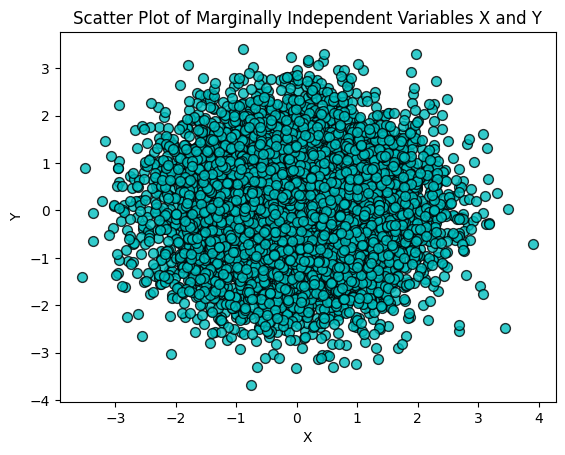

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two independent random variables
X = np.random.normal(0, 1, 10000)
Y = np.random.normal(0, 1, 10000)

# Plot their joint distribution
plt.scatter(X, Y, alpha=0.8, c='c', edgecolor='k', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Marginally Independent Variables X and Y')
plt.show()

2. **Conditional independence** refers to the lack of a relationship between two random variables, given the value of one or more other variables. Mathematically, two random variables $X$ and $Y$ are conditionally independent given a variable ($X \perp Y | Z$) if their conditional probability distribution satisfies

\begin{equation}
    P(X, Y | Z) = P(X | Z)P(Y | Z)
\end{equation}

To illustrate this, let's generate three random variables $X$, $Y$, and $Z$ such that:
- $X$ and $Y$ are dependent on $Z$
- $X$ and $Y$ are conditionally independent given $Z$

This is done by adding noise to $Z$ to generate $X$ and $Y$. 


We first plot the scatter plot of $X$ and $Y$ without considering $Z$, which may show some correlation.

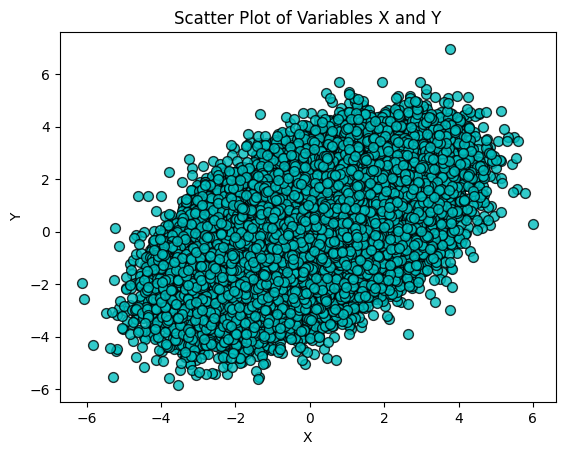

In [5]:
# Generate three random variables such that X and Y are independent given Z
Z = np.random.normal(0, 1, 100000)
X = Z + np.random.normal(0, 1, 100000)
Y = Z + np.random.normal(0, 1, 100000)

# Plot X and Y
plt.scatter(X, Y, alpha=0.8, c='c', edgecolor='k', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Variables X and Y')
plt.show()

 Then, we plot $X$ and $Y$ for different ranges of $Z$. If $X$ and $Y$ are conditionally independent given $Z$, the scatter plots for different values of $Z$ should show no pattern, demonstrating that knowing $Z$ removes the dependence between $X$ and $Y$.

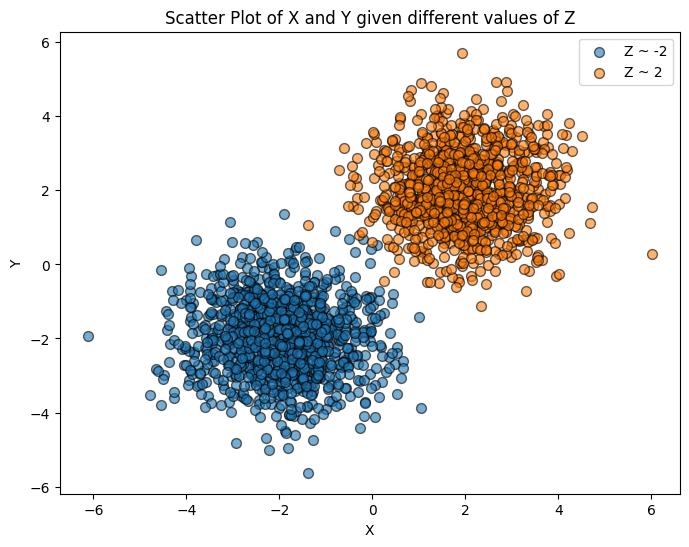

In [6]:
# Now, plot X and Y given Z
plt.figure(figsize=(8, 6))
for z_value in [-2, 2]:
    mask = (Z >= z_value - 0.1) & (Z <= z_value + 0.1)
    plt.scatter(X[mask], Y[mask], alpha=0.6, label=f'Z ~ {z_value}', edgecolor='k', s=50)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y given different values of Z')
plt.legend()
plt.show()

## Expectation, variance, and covariance

The expectation (or expected value) of a continuous random variable $X$ with probability density function $p(x)$ is

\begin{equation}
    \mathbb{E}[X] = \int xp(x)dx
\end{equation}

while the expectation of a discrete random variable with probability mass function $p(x)$ is

\begin{equation}
    \mathbb{E}[X] = \sum_{x} xp(x)
\end{equation}

The expectation of any function of a random variable, $f(X)$, is given by

\begin{equation}
    \mathbb{E}[X] = \int f(x)p(x)dx
\end{equation}

The deviation or fluctuation of $X$ from its expected value is $X - \mathbb{E}[X]$. The variance of a random variable $X$ measures the dispersion around its mean, and it is given by

\begin{equation}
    \operatorname{Var}[X] = \mathbb{E}[(X - \mathbb{E}[X])^2]
\end{equation}

The covariance of two random variables $X$ and $Y$ measures the degree to which two random variables change together. If the variables tend to show similar behavior (they tend to be above or below their expected values together), the covariance is positive. If one variable tends to increase when the other decreases, the covariance is negative. It is given by

\begin{equation}
    \operatorname{Cov}[X,Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
\end{equation}

Some **algebraic properties** of expectation, variance, and covariance will be extremely useful in manipulating and deriving statistical quantities of interest:

- **Linearity of expectations**:
    \begin{equation}
        \mathbb{E}[aX+bY] = a\mathbb{E}[X] + b\mathbb{E}[Y]
    \end{equation}
    Expectation is a linear operator. The expectation of a sum of random variables is the sum of their expectations, and the expectation of a scaled random variable is the scale factor times the expectation of the variable.
  
- **Variance identity**:
    \begin{equation}
        \operatorname{Var}[X] = \mathbb{E}[(X-\mathbb{E}[X])^2] = \mathbb{E}[X^2]-(\mathbb{E}[X])^2
    \end{equation}
    Expanding $\mathbb{E}[(X-\mathbb{E}[X])^2]$ we get $\mathbb{E}[X^2 -2X \mathbb{E}[X] + (\mathbb{E}[X])^2]$, which is equal to $\mathbb{E}[X^2] -2\mathbb{E}[X \mathbb{E}[X]] + \mathbb{E}[(\mathbb{E}[X])^2]$. However, $\mathbb{E}[X]$ is a constant (because it is the expected value of a random variable, it is not random anymore), so $\mathbb{E}[\mathbb{E}[X]]$ is just $\mathbb{E}[X]$. So that becomes $\mathbb{E}[X^2] -2\mathbb{E}[X] \mathbb{E}[X] + (\mathbb{E}[X])^2 = \mathbb{E}[X^2] -2(\mathbb{E}[X])^2 + (\mathbb{E}[X])^2$.

- **Covariance identity**:
    \begin{equation}
        \operatorname{Cov}[X,Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY]-\mathbb{E}[X]\mathbb{E}[Y]
    \end{equation}
    Expanding the product $(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])$ we get $X - X\mathbb{E}[Y] - Y\mathbb{E}[X] + \mathbb{E}[X]\mathbb{E}[Y]$. Taking the expectation  we get $\mathbb{E}[XY] - \mathbb{E}[X\mathbb{E}[Y]] - \mathbb{E}[Y\mathbb{E}[X]] + \mathbb{E}[\mathbb{E}[X]\mathbb{E}[Y]]$. Because the expectation is constant, we get to $\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] - \mathbb{E}[Y]\mathbb{E}[X] + \mathbb{E}[X]\mathbb{E}[Y]$.

- **Covariance is symmetric**:
    \begin{equation}
        \operatorname{Cov}[X,Y] = \operatorname{Cov}[Y,X]
    \end{equation}
    The direction of comparison does not matter for covariance, whether you measure how $X$ varies with $Y$ or $Y$ with $X$, the result is the same.

- **Variance is covariance with itself**:
    \begin{equation}
        \operatorname{Cov}[X,X] = \operatorname{Var}[X]
    \end{equation}
    Covariance measures how two variables vary together, and variance is a special case where these two variables are the same.

- **Variance is not linear**:
    \begin{equation}
        \operatorname{Var}[aX + b] = a^2\operatorname{Var}[X]
    \end{equation}
    The square in the variance formula leads to a squared scale factor when a random variable is scaled. The addition of a constant $b$ does not affect variance, as variance measures dispersion around the mean, which is unaffected by constant shifts. To show why $a$ becomes $a^2$, we have $\operatorname{Var}[aX] = \mathbb{E}[(aX-\mathbb{E}(aX)^2]$, which is equal to $\mathbb{E}[a^2(X-\mathbb{E}(X)^2] = a^2\mathbb{E}[(X-\mathbb{E}(X)^2]$.

- **Covariance is not linear**:
    \begin{equation}
        \operatorname{Cov}[aX + b,Y] = a\operatorname{Cov}[X,Y]
    \end{equation}
    Scaling one variable in a covariance relationship scales the covariance itself but does not affect the relationship's direction or absence (signified by zero covariance). The addition of a constant does not affect covariance, as it does not change how one variable varies with another.

- **Variance of a sum**:
    \begin{equation}
        \operatorname{Var}[X+Y] = \operatorname{Var}[X] + \operatorname{Var}[Y] + 2\operatorname{Cov}[X,Y]
    \end{equation}
    The variance of a sum includes the individual variances and an additional term to account for how the variables co-vary. This comes from expanding $\mathbb{E}[(X + Y - \mathbb{E}[X+Y])^2]$ and using the linearity of expectations.

- **Variance of a large sum**:
    \begin{equation}
        \operatorname{Var}\left[ \sum_{i=1}^{n}X_i \right] = \sum_{i=1}^{n}\sum_{j=1}^{n}\operatorname{Cov}[X_i,X_j] = \sum_{i=1}^{n}\operatorname{Var}[X_i] + 2\sum_{i=1}^{n-1}\sum_{j>i}\operatorname{Cov}[X_i,X_j]
    \end{equation}
    The variance of a sum of multiple random variables includes both their individual variances and the covariance terms for every pair.

- **Law of total expectations**:
    \begin{equation}
        \mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X|Y]]
    \end{equation}
    Suppose we have two random variables $X$ and $Y$. We want to express the expectation of $X$ (a marginal expectation) in terms of its conditional expectation given $Y$. his law states that the overall expectation of $X$ can be found by taking the expectation of the conditional expectation of $X$ given $Y$. In practice, what we are doing is splitting the entire probability space into parts based on the values of $Y$, calculating the expected value of $X$ (this is $\mathbb{E}[X|Y]$), and then taking the expectation of these conditional expectations over the distribution of $Y$. Imagine $Y$ as categorizing or segmenting the probability space into different scenarios or groups. Within each group, you calculate the average value of $X$ (this gives you $\mathbb{E}[X|Y=y]$ for each $y$). Then, you average these averages over all possible groups (weighted by the probability of each group $Y=y$, leading back to the overall average of $X$. This law is particularly useful in scenarios where direct calculation of $\mathbb{E}[X]$ is complex but where conditional expectations $\mathbb{E}[X|Y]$ are simpler to compute.
    This is the expected value (or mean) of $X$ given a particular value of $Y$. In many statistical models, especially in predictive modeling, this conditional mean can be thought of as a ``prediction'' of  $X$ based on the knowledge of $Y$. For example, if $Y$ represents a set of features or conditions, then $\mathbb{E}[X|Y]$ is our best guess or prediction of $X$ under those conditions.

- **Law of total variance**:
    \begin{equation}
        \operatorname{Var}[X] = \operatorname{Var}[\mathbb{E}[X|Y]] + \mathbb{E}[\operatorname{Var}[X|Y]]
    \end{equation}
    This law decomposes the total variance into two parts. The first part can be thought of as between-group variability and measures how much the conditional means vary as $Y$ changes. The second term is the within-group variability and represents the average of the variances within each group defined by $Y$.

- **Independence implies zero covariance**:
    \begin{equation}
        X \perp Y \rightarrow \operatorname{Cov}[X,Y] = 0
    \end{equation}
    Independence between two variables means the occurrence of one does not affect the probability distribution of the other. This lack of influence translates mathematically to zero covariance. However, the converse is not necessarily true as zero covariance does not capture nonlinear dependencies.

## Convergence

The **law of large numbers (LLN)** states that, for a sequence of independent and identically distributed (i.i.d.) random variables $X_1, X_2 \ldots, X_n$ each with expected value $\mathbb{E}[X]$, the sample mean converges to the expected value as $n$ approaches infinity

\begin{equation}
    \frac{1}{n}\sum_{i=1}^{n}X_i \rightarrow \mathbb{E}[X] \quad \text{ as } n \rightarrow \infty
\end{equation}

The **i.i.d. assumption** is a fundamental concept in probability theory and statistics, with significant implications. Independence implies that the occurrence of one event or the value of one variable does not influence the occurrence of another. In the context of random variables, $X_1, X_2 \ldots, X_n$ being independent means the outcome of $X_i$ provides no information about the outcome of $X_j$, $i\neq j$. Identically distributed means that each of the random variables has the same probability distribution. They do not need to take on the same value, but the rules governing their behavior (i.e., the likelihood of each outcome) are identical. In the context of supervised learning, the i.i.d. assumption assumes that the training and test data are independently drawn from the same underlying probability distribution. This enables the use of statistical tools and techniques, such as maximum likelihood estimation and hypothesis testing, which are based on the assumption of independent and identically distributed data. In real-world data, this assumption is often violated as data may be dependent and non-identically distributed due to distribution shifts across geography or time, sampling practices, or the presence of confounding variables and selection bias.

To illustrate the LLN, we can generate a sequence of independent and identically distributed (i.i.d.) random variables and observe how their sample mean converges to the expected value as the number of samples increases.

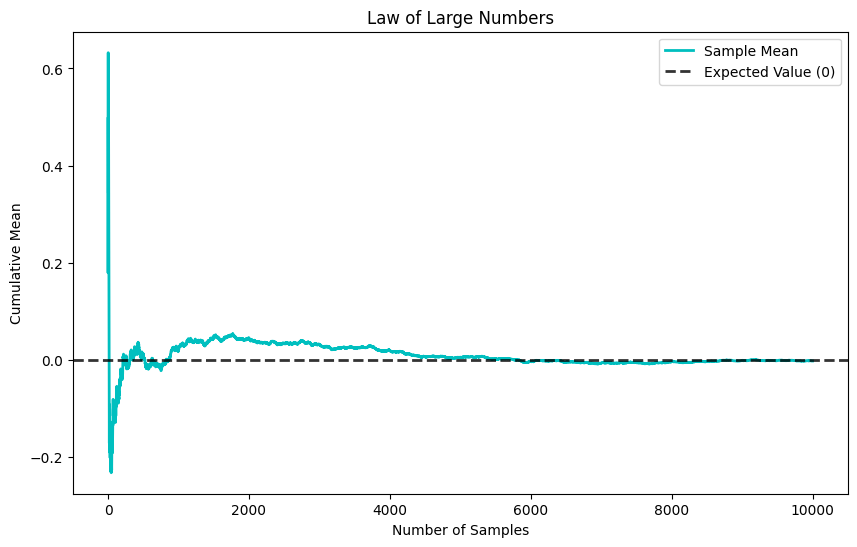

In [7]:
# Generate a sequence of i.i.d. random variables
np.random.seed(42)
n = 10000
X = np.random.normal(loc=0, scale=1, size=n)

# Compute the cumulative mean
cumulative_mean = np.cumsum(X) / np.arange(1, n + 1)

# Plot the cumulative mean
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean, label='Sample Mean', lw=2, c='c')
plt.axhline(y=0, color='k', linestyle='--', label='Expected Value (0)', lw=2, alpha=.8)
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Mean')
plt.title('Law of Large Numbers')
plt.legend()
plt.show()

The **central limit theorem (CLT)** states that if $X_1, X_2, \ldots, X_n$ are i.i.d. random variables with an expected value $\mathbb{E}[X]$ and a finite variance $\operatorname{Var}[X]$, the distribution of the sample mean

\begin{equation}
    \bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i
\end{equation}

approaches a normal distribution as $n \rightarrow \infty$. Specifically, the standardized form
\begin{equation}
    \frac{\bar{X}_n - \mathbb{E}[X]}{\sqrt{\operatorname{Var}[X]/n}}
\end{equation}
approaches the standard normal distribution $N(0, 1)$.

The motivation behind the CLT lies in its ability to provide a predictable and well-understood behavior (the normal distribution) for averages of random variables, regardless of the original distribution of these variables. This is particularly useful in practical scenarios such as statistical sampling and hypothesis testing, where it is often necessary to make inferences about population parameters. The intuition of the CLT is that as we increase the number of random variables in our sample, the peculiarities and individual randomness of each variable tend to cancel out. This leads to the emergence of the normal distribution, which is symmetric and centered around the mean. The CLT is powerful because it applies to a wide range of distributions, whether they are symmetric, skewed, or even arbitrary, as long as the variables are i.i.d. with a finite variance.

## Estimation: bias and variance

When observing values $X_1, X_2, \ldots, X_n$ from a distribution, the true nature of this distribution is often unknown. In many cases, we are interested in estimating a parameter $\theta$ of this distribution, such as the mean or variance. This process involves several key concepts:

- **Statistic**: a function of the observed data, or the data alone.
- **Estimator**: a rule or a function that tells you how to infer or guess the value of a parameter $\theta$, or some function of it, denoted as $h(\theta)$. Suppose you want to estimate the population mean. The sample mean (denoted usually as $\bar{X}$) is an estimator. It is a function that calculates the mean of your sample data.
- **Estimand**: the quantity that we want to estimate.
- **Estimate**: the actual numerical value obtained by applying the estimator to your data. It is an approximation of some estimand, which we get using data.


We typically denote an estimator of $\theta$ as $\widehat{\theta}_n$, where the hat symbol signifies that it approximates the true parameter, and the subscript $n$ indicates its dependence on the sample size. An estimator is itself a random variable because it is a function of random data. Its distribution, known as the sampling distribution, depends on the distribution of the data $X_i$. A desirable property of an estimator is consistency, which means that $\hat{\theta}_n$ converges to $\theta$ as $n \rightarrow \infty$. An estimator that fails to be consistent is generally not desirable. Two important properties of estimators are:
1. **Bias**: the difference between the expected value of the estimator and the true parameter value. An estimator is unbiased if $\mathbb{E}[\widehat{\theta}_n] = \theta$ for all $\theta$.
2. **Variance**: a measure of the spread of the estimator's sampling distribution. The variance of an estimator indicates how much the estimator varies from sample to sample. The square root of this variance is called the standard error, which provides a measure of how precise our estimate is.


Let's now provide an example to illustrate the concepts of bias and variance in the context of estimating the mean of a normal distribution. We assume a true mean ($\mu$) of 5 and generate 100 samples, each consisting of 30 observations drawn from a normal distribution with this true mean and a standard deviation of 2. For each sample, we compute the **sample mean**, which serves as our estimator for the population mean.

The sample means are then used to evaluate the bias and variance of the estimator: 
- The bias is calculated as the difference between the average of the sample means (the expected value of the estimator) and the true mean. A low bias indicates that the estimator is accurate on average
- The variance is a measure of the spread of the sample means around their average. A low variance indicates that the estimator is reliable and produces similar estimates across different samples.

True Mean: 5
Estimated Mean: 5.06400167175167
Bias: 0.0640016717516696
Variance: 0.12043348413823464


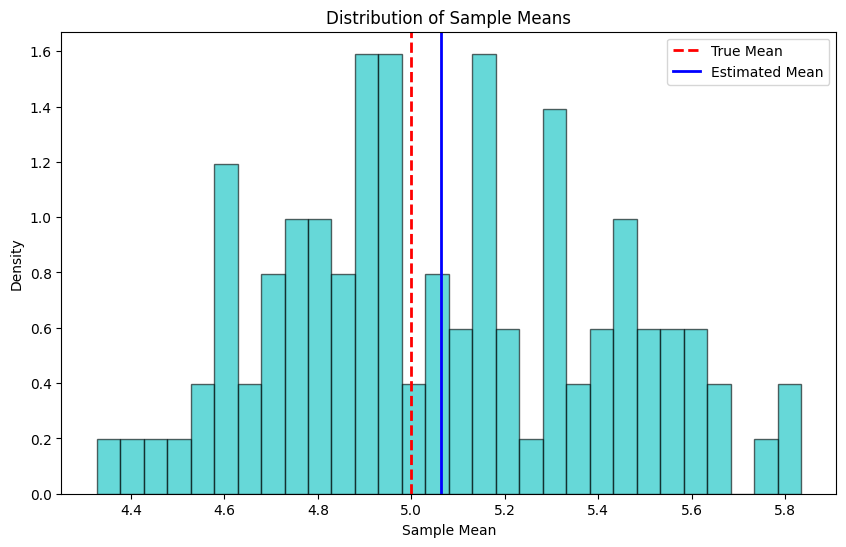

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# True parameter
true_mean = 5

# Generate multiple samples
np.random.seed(42)
n_samples = 100
sample_size = 30
samples = [np.random.normal(loc=true_mean, scale=2, size=sample_size) for _ in range(n_samples)]

# Calculate sample means
sample_means = np.array([np.mean(sample) for sample in samples])

# Calculate bias and variance
estimated_mean = np.mean(sample_means)
bias = estimated_mean - true_mean
variance = np.var(sample_means)

# Print results
print(f"True Mean: {true_mean}")
print(f"Estimated Mean: {estimated_mean}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='c', edgecolor='k')
plt.axvline(true_mean, color='r', linestyle='--', linewidth=2, label='True Mean')
plt.axvline(estimated_mean, color='b', linestyle='-', linewidth=2, label='Estimated Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means')
plt.legend()
plt.show()

The histogram of the sample means provides a visual representation of the estimator's sampling distribution. The true mean is marked by a red dashed line, and the average of the sample means (the estimated mean) is shown with a solid blue line. This visualization helps to see how the sample means are distributed around the true mean, illustrating the concepts of bias (how far the average estimate is from the true value) and variance (how spread out the estimates are).

### Main Probability Distributions

**Normal Distribution**

The normal distribution, also known as the Gaussian distribution, is central in statistics due to its symmetric, bell-shaped curve. It is characterized by its mean $ \mu $ and standard deviation $ \sigma $, with the probability density function (PDF) given by

\begin{equation}
    f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

The significance of the normal distribution arises from the Central Limit Theorem (CLT), which states that sums of independent random variables converge to a normal distribution, regardless of the original distribution of these variables, making it applicable in a wide array of scenarios. This property underscores the normal distribution's role in approximating the behavior of various real-world random processes.

**Chi-Squared Distribution**

The chi-squared distribution is another key distribution in statistics, especially in hypothesis testing and confidence interval estimation. It arises as the sum of the squares of independent standard normal variables. Specifically, if $ Z_1, Z_2, ..., Z_k $ are independent standard normal random variables, then $ \sum_{i=1}^{k} Z_i^2 $ follows a chi-squared distribution with $ k $ degrees of freedom. Its PDF for $ x > 0 $ and $ k $ degrees of freedom is

\begin{equation}
    f(x;k) = \frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)}
\end{equation}

This distribution is asymmetric and skewed to the right, with its shape and spread depending on the degrees of freedom $ k $. It is primarily used in the chi-squared test for independence and goodness of fit, and in estimating variances of normal distributions.

**F-Distribution**

The F-distribution is crucial in the context of variance analysis and hypothesis testing. It is the ratio of two scaled chi-squared distributions: if $ U $ follows a chi-squared distribution with $ d_1 $ degrees of freedom and $ V $ follows an independent chi-squared distribution with $ d_2 $ degrees of freedom, then the ratio $ \frac{U/d_1}{V/d_2} $ follows an F-distribution. Its PDF is described by

\begin{equation}
    f(x; d_1, d_2) = \frac{\sqrt{\frac{(d_1x)^{d_1}d_2^{d_2}}{(d_1x+d_2)^{d_1+d_2}}}}{x\text{B}\left(\frac{d_1}{2},\frac{d_2}{2}\right)}
\end{equation}

where $ d_1 $ and $ d_2 $ are the degrees of freedom. The distribution is non-symmetric, bounded at the left by 0, and its shape varies with the degrees of freedom. It is particularly useful in comparing variances between two samples, as in ANOVA and regression analysis.

**Student's t-Distribution**

The Student's t-distribution arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. It is defined by the PDF

\begin{equation}
    f(t) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}
\end{equation}

where $ \nu $ denotes degrees of freedom. The t-distribution resembles the normal distribution but has heavier tails, meaning it is more prone to producing values that fall far from its mean. This property makes it particularly useful in hypothesis testing and constructing confidence intervals when the sample size is small. As the sample size increases, the t-distribution approaches the normal distribution, illustrating the connection between them.

The Student's t-distribution is particularly useful when dealing with small sample sizes or when the population variance is unknown. It is defined as the distribution of the ratio of a standard normal random variable $Z$ (with mean 0 and variance 1) and the square root of a chi-square random variable $X$ divided by its degrees of freedom $v$, i.e.,

\begin{equation}
T = \frac{Z}{\sqrt{X/v}}
\end{equation}

where $Z$ follows a standard normal distribution and $X$ follows a chi-square distribution with $v$ degrees of freedom. The resulting $T$ follows a Student's t-distribution with $v$ degrees of freedom.

This distribution is symmetric and bell-shaped like the normal distribution but has heavier tails, meaning it is more prone to producing values that fall far from its mean. This property makes the t-distribution particularly suitable for small sample sizes, as it accounts for the increased uncertainty that comes with fewer observations.

The t-distribution is central to many statistical tests, including the t-test for assessing the statistical significance of the difference between two sample means, the construction of confidence intervals for the mean of a normally distributed population when the standard deviation is unknown, and in linear regression analysis.

The relationship between the normal distribution, the chi-square distribution, and the t-distribution highlights the importance of understanding how distributions can be related and transformed into each other, providing a powerful framework for statistical inference.

**Exponential Distribution**

The exponential distribution models the time between events in processes with a constant rate of occurrence and is pivotal in reliability analysis and queuing theory. Its memoryless property implies that the probability of an event occurring in the next instant is independent of how much time has already elapsed. The PDF is

\begin{equation}
    f(x;\lambda) = \lambda e^{-\lambda x}
\end{equation}

for $ x \geq 0 $. This distribution describes the time until an event like failure or arrival occurs and is widely used in survival analysis and reliability engineering.

**Binomial Distribution**

The binomial distribution is fundamental in modeling binary outcomes and represents the number of successes in a fixed number of independent Bernoulli trials. The PDF is

\begin{equation}
    f(k;n,p) = \binom{n}{k}p^k(1-p)^{n-k}
\end{equation}

where $ k $ is the number of successes, $ n $ the number of trials, and $ p $ the probability of success. The shape of the binomial distribution can be symmetric or skewed depending on the values of $ n $ and $ p $. It is extensively used in scenarios like quality control, survey analysis, and clinical trials, providing a model for situations where outcomes are binary and probabilistically independent.

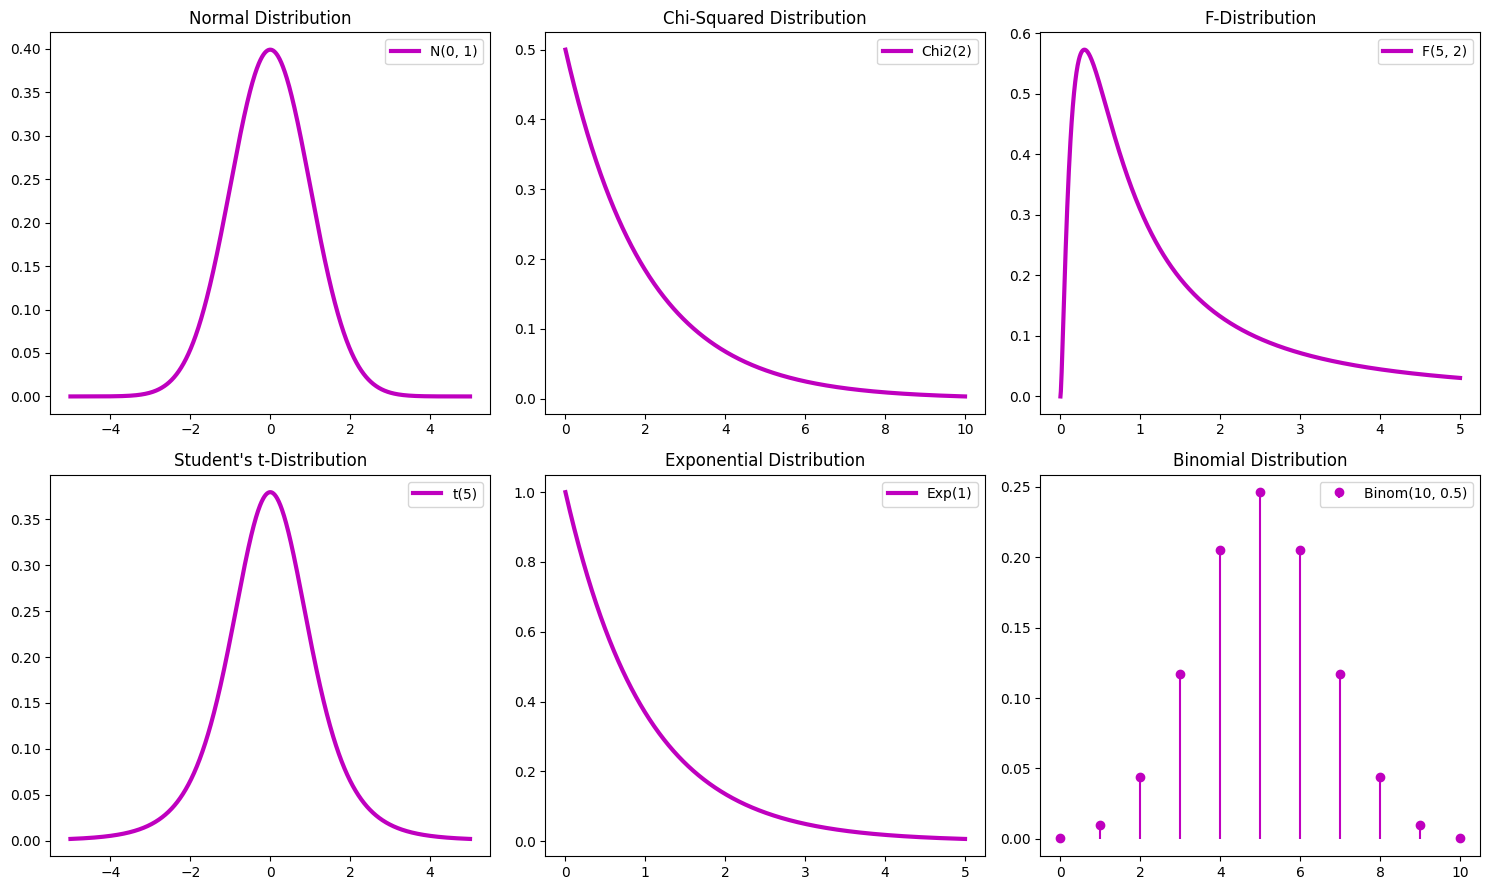

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

# Normal Distribution
mu, sigma = 0, 1
x = np.linspace(-5, 5, 1000)
y = stats.norm.pdf(x, mu, sigma)
axes[0, 0].plot(x, y, label=f'N({mu}, {sigma**2})', lw=3, c='m')
axes[0, 0].set_title('Normal Distribution')
axes[0, 0].legend()

# Chi-Squared Distribution
df = 2
x = np.linspace(0, 10, 1000)
y = stats.chi2.pdf(x, df)
axes[0, 1].plot(x, y, label=f'Chi2({df})', lw=3, c='m')
axes[0, 1].set_title('Chi-Squared Distribution')
axes[0, 1].legend()

# F-Distribution
d1, d2 = 5, 2
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, d1, d2)
axes[0, 2].plot(x, y, label=f'F({d1}, {d2})', lw=3, c='m')
axes[0, 2].set_title('F-Distribution')
axes[0, 2].legend()

# Student's t-Distribution
df = 5
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)
axes[1, 0].plot(x, y, label=f't({df})', lw=3, c='m')
axes[1, 0].set_title('Student\'s t-Distribution')
axes[1, 0].legend()

# Exponential Distribution
lambda_ = 1
x = np.linspace(0, 5, 1000)
y = stats.expon.pdf(x, scale=1/lambda_)
axes[1, 1].plot(x, y, label=f'Exp({lambda_})', lw=3, c='m')
axes[1, 1].set_title('Exponential Distribution')
axes[1, 1].legend()

# Binomial Distribution
n, p = 10, 0.5
x = np.arange(0, n + 1)
y = stats.binom.pmf(x, n, p)
axes[1, 2].stem(x, y, basefmt=" ", label=f'Binom({n}, {p})', linefmt='m')
axes[1, 2].set_title('Binomial Distribution')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

**Explanation of plots:**

1. **Normal distribution:** the plot shows the symmetric bell-shaped curve of the normal distribution with mean 0 and standard deviation 1.

2. **Chi-Squared distribution:** the plot illustrates the chi-squared distribution with 2 degrees of freedom, showing its right-skewed nature.

3. **F-distribution:** the plot shows the F-distribution with degrees of freedom 5 and 2, highlighting its right-skewed shape.

4. **Student's t-distribution:** the plot depicts the t-distribution with 5 degrees of freedom, showing its similarity to the normal distribution but with heavier tails.

5. **Exponential distribution:** the plot displays the exponential distribution with a rate parameter of 1, showing its memoryless property and right-skewed shape.

6. **Binomial distribution:** the plot illustrates the binomial distribution with 10 trials and a success probability of 0.5, showing the discrete probability mass function.

These visualizations help in understanding the different probability distributions and their properties, which are fundamental in various statistical analyses and applications.

## Hypothesis testing framework

Hypothesis testing is a fundamental framework in statistics used to determine whether there is enough evidence in a sample of data to infer that a certain condition holds for the entire population. In hypothesis testing, two contradictory hypotheses about a population parameter are considered: the null hypothesis ($H_0$) and the alternative hypothesis ($H_1$). The null hypothesis represents a default position or a statement of no effect or no difference. The alternative hypothesis represents what we want to prove or establish.

A test statistic is calculated from the sample data and is used to assess the truth of the null hypothesis. The choice of test statistic depends on the nature of the data and the hypothesis being tested. The P-value is the probability of observing a test statistic as extreme as, or more extreme than, the observed value under the assumption that the null hypothesis is true. A smaller P-value indicates that the observed data is less likely under the null hypothesis. Based on the P-value and a predetermined significance level (usually denoted as $\alpha$, commonly set at 0.05), a decision is made: if the P-value is less than $\alpha$, the null hypothesis is rejected in favor of the alternative hypothesis; if the P-value is greater than $\alpha$, there is not enough evidence to reject the null hypothesis.

In hypothesis testing, two types of errors can occur. Type I error corresponds to rejecting the null hypothesis when it is actually true (false positive). The probability of making a Type I error is $\alpha$. Type II error is failing to reject the null hypothesis when the alternative hypothesis is true (false negative).

Hypothesis testing is a critical tool in statistics for making inferences about populations based on sample data. It allows researchers to test assumptions and make decisions based on statistical evidence. The goal of hypothesis testing is not to prove the null hypothesis but to assess the strength of evidence against it. Hypothesis testing is a foundational concept in statistics used to infer the properties of a population based on sample data. The choice of distribution for conducting a hypothesis test depends on the nature of the data, the size of the sample, and the assumptions that can be made about the population. Below, we explore various hypothesis tests, the distributions used, and the rationale for their use.

### Comparing Means

- **Z-test:** Used when comparing the mean of a sample to a known population mean, or comparing the means of two large independent samples. The Z-test is applicable when the population variance is known and the sample size is large (typically $n > 30$). The normal distribution is used due to the Central Limit Theorem (CLT), which states that the sampling distribution of the sample mean will approximate a normal distribution as the sample size becomes large, regardless of the population's distribution.

- **T-test:** Used when the population variance is unknown and the sample size is small, the t-distribution is used. The t-test is more accommodating of the uncertainty in the sample estimate of the variance, providing more accurate confidence intervals and P-values. The t-distribution converges to the normal distribution as the sample size increases.
  - **One-sample t-test:** Compares the mean of a single sample to a known mean.
  - **Two-sample t-test:** Compares the means of two independent samples.
  - **Paired t-test:** Compares means from the same group at different times or under different conditions.

Let'see an example of a one-sample t-test to check if the mean height of a sample of people is different from a known population mean of 170 cm.

T-statistic: 1.289, P-value: 0.207
Significance level (alpha): 0.05
Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the mean height of the sample is significantly different from the population mean of 170 cm at the 0.05 significance level.


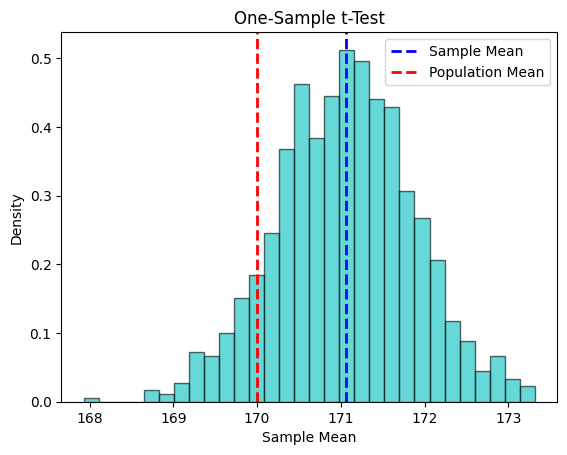

In [10]:
# Sample data
np.random.seed(42)
sample_heights = np.random.normal(loc=172, scale=5, size=30)

# Perform one-sample t-test
population_mean = 170
t_statistic, p_value = stats.ttest_1samp(sample_heights, population_mean)

# Significance level
alpha = 0.05

# Output the results
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")
print(f"Significance level (alpha): {alpha}")

# Automated conclusion based on P-value
if p_value < alpha:
    conclusion = (f"Reject the null hypothesis. There is sufficient evidence to conclude that the mean height of the "
                  f"sample is significantly different from the population mean of 170 cm at the {alpha} significance level.")
else:
    conclusion = (f"Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the mean height "
                  f"of the sample is significantly different from the population mean of 170 cm at the {alpha} significance level.")

print(conclusion)

# Plotting the distribution of sample means
sample_means = [np.mean(np.random.choice(sample_heights, size=30, replace=True)) for _ in range(1000)]
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='c', edgecolor='black')
plt.axvline(np.mean(sample_heights), color='b', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(population_mean, color='r', linestyle='--', linewidth=2, label='Population Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('One-Sample t-Test')
plt.legend()
plt.show()


Let's also see an example of the two-sample t-test to compare the mean heights of two independent samples and determine if there is a statistically significant difference between the two population means. Using a significance level of 0.05, the two-sample t-test calculates the t-statistic and P-value to assess the null hypothesis that the means of the two samples are equal. If the P-value is less than 0.05, the null hypothesis is rejected, indicating a significant difference between the sample means.

T-statistic: 3.598, P-value: 0.000
Significance level (alpha): 0.05
Reject the null hypothesis. There is sufficient evidence to conclude that the mean heights of the two samples are significantly different at the 0.05 significance level.


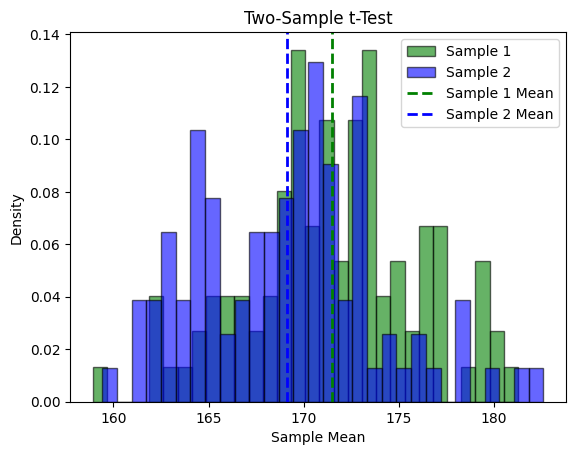

In [11]:
# Sample data
np.random.seed(42)
sample1 = np.random.normal(loc=172, scale=5, size=100)
sample2 = np.random.normal(loc=169, scale=5, size=100)

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Significance level
alpha = 0.05

# Output the results
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")
print(f"Significance level (alpha): {alpha}")

# Automated conclusion based on P-value
if p_value < alpha:
    conclusion = (f"Reject the null hypothesis. There is sufficient evidence to conclude that the mean heights of the "
                  f"two samples are significantly different at the {alpha} significance level.")
else:
    conclusion = (f"Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the mean heights "
                  f"of the two samples are significantly different at the {alpha} significance level.")

print(conclusion)

# Plotting the distribution of sample means
plt.hist(sample1, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Sample 1')
plt.hist(sample2, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Sample 2')
plt.axvline(np.mean(sample1), color='g', linestyle='dashed', linewidth=2, label='Sample 1 Mean')
plt.axvline(np.mean(sample2), color='b', linestyle='dashed', linewidth=2, label='Sample 2 Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Two-Sample t-Test')
plt.legend()
plt.show()

### Comparing Variances

- **F-test:** Used in the analysis of variance (ANOVA) and for comparing the variances of two samples. The F-distribution arises naturally when comparing the ratio of two variances, each of which follows a chi-squared distribution when the underlying population is normally distributed. The F-test assesses whether the groups have the same variance, an assumption often required in ANOVA and regression analysis. ANOVA is used to compare the means of three or more samples. The F-distribution is used in ANOVA to compare the ratio of the variance explained by the model to the variance within the groups. This test helps to determine if there are significant differences between the means of the groups.

### Regression Analysis

- **T-tests for regression coefficients:** To determine if individual predictors are significantly related to the dependent variable, t-tests are used, leveraging the t-distribution. This is because the estimates of the coefficients have distributions that are best modeled by the t-distribution, especially with small sample sizes.
- **F-test for overall model significance:** The F-test is used to assess whether at least one predictor variable has a non-zero coefficient, indicating that the model provides a better fit to the data than a model with no predictors. This test uses the F-distribution, comparing the model's explained variance to the unexplained variance.

### Goodness of Fit and Independence Tests

- **Chi-squared test:** Used for categorical data to assess how likely it is that an observed distribution is due to chance. It is used in goodness-of-fit tests to compare the observed distribution to an expected distribution, and in tests of independence to evaluate the relationship between two categorical variables in a contingency table. The chi-squared distribution is used because the test statistic follows this distribution under the null hypothesis.

- **Non-parametric tests:** Used when the assumptions about the population distribution are not met. These tests do not rely on the normality assumption and often use ranking methods or resampling techniques. Examples include the Mann-Whitney U test, Wilcoxon signed-rank test, and Kruskal-Wallis H test.


## Bayesian Learning

Statistical methods can be broadly divided into two macro-categories: frequentist and Bayesian. The frequentist approach views parameters as fixed but unknown quantities, uses data to estimate these parameters, and makes point estimates (i.e., a single best guess) for these parameters. In contrast, the Bayesian approach views parameters as random variables, uses data and prior beliefs (prior distributions) to update our beliefs about these parameters, and results in a probability distribution over the parameters, capturing the uncertainty.

One key difference is that Bayesian statistics treats probability as a measure of belief or certainty rather than frequency. This means probabilities are subjective and can be updated as new information becomes available. In frequentist statistics, probability is interpreted as the long-run frequency of events, relying on the concept of an infinite sequence of repeated trials. Bayesian methods incorporate prior knowledge or beliefs through the use of prior probability distributions, while frequentist methods make inferences solely from the data at hand.

Bayesian learning is formalized using **Bayes' theorem**:

$$
P(\theta | X) = \frac{P(X | \theta)P(\theta)}{P(X)}
$$

where:
- $P(\theta | X)$ is the posterior distribution of the parameters given the data.
- $P(X | \theta)$ is the likelihood of the data given the parameters. It represents the probability of observing the data $X$ given a particular set of parameters $\theta$.
- $P(\theta)$ is the prior distribution of the parameters (our beliefs before seeing the data).
- $P(X)$ is the evidence or marginal likelihood. It is the probability of the data over all possible parameter values, acting as a normalizing constant to ensure the posterior distribution sums (or integrates) to 1.

Bayes' Theorem allows us to update our initial beliefs or probabilities $P(\theta)$ in light of new evidence ($X$). In other words, it provides a way to revise existing predictions or hypotheses given new or additional information. 


**Estimating the posterior distribution**

Computing the posterior distribution means determining the probability distribution of the parameters of a model given the observed data. This involves updating our beliefs about possible parameter values based on the evidence provided by the data. The main challenge in Bayesian learning is computing the posterior distribution, especially for complex models. This is where methods like Markov chain Monte Carlo (MCMC) come into play. Because of these challenges, we often resort to methods like sampling (e.g., MCMC) or approximations to estimate the posterior distribution, rather than computing it exactly. The goal is to get a representation of the distribution that lets us make informed decisions about the likely values of the parameters given the data.

Estimating the posterior distribution is the core of Bayesian inference. After observing data, we combine our prior beliefs with the likelihood of the observed data to compute the posterior distribution. The shape of this distribution reflects our updated beliefs about the parameters given the data. Once we have the posterior distribution, we can draw samples from it. Each sample represents a plausible value of the parameter(s) given our prior beliefs and the observed data. By looking at the spread and distribution of these samples, we can understand the uncertainty associated with our estimates. 

In many situations, especially with complex models, the posterior distribution might not have a simple analytical form. In these cases, we cannot just "look" at the posterior directly. Instead, we use sampling techniques (like MCMC methods) to draw samples from the posterior, even if we cannot describe the posterior in a simple equation. These samples then serve multiple purposes:

- **Uncertainty estimation:** the spread and distribution of the samples give a sense of how uncertain we are about our parameter estimates.
- **Predictive modeling:** we can use the samples to make predictions for new data and to get a sense of uncertainty in those predictions.
- **Model checking:** we can compare the predictions of our model (using the posterior samples) to the actual observed data to see if our model is a good fit.
- **Decision making:** in practical scenarios, decisions might be based on the posterior samples, especially when we need to consider the uncertainty in our estimates.

In summary, while the posterior distribution encapsulates our updated beliefs after seeing data, sampling from the posterior allows us to quantify, explore, and make decisions based on the uncertainty in those beliefs.

### Markov chain Monte Carlo (MCMC)

MCMC algorithms are used to approximate complex probability distributions. They are especially useful in Bayesian statistics when direct computation of the posterior distribution is challenging. The basic idea is to generate samples from a complex distribution, which is too intricate to tackle directly. Instead of computing it exactly, we generate samples that come from that distribution. Over time, the distribution of these samples will closely match the target distribution. 

The key concepts of MCMC are two-fold:
- **Markov chain:** a sequence of random samples where each sample depends only on the one before it. It is like a random walk where each step is influenced only by the current position.
- **Monte Carlo:** a technique where random sampling is used to get numerical results for problems that might be deterministic in principle. The name originates from the Monte Carlo Casino, as it relies on randomness.

The main steps of MCMC algorithms are:
- **Initialization:** start at a random position (a random parameter value).
- **Proposal:** at each step, propose a new position based on the current one. This can be a random jump, but it is typically a small move.
- **Acceptance:** decide whether to move to the proposed position. If the new position is a better fit to the data (higher posterior probability), we will likely accept it. If it is worse, we might still accept it but with a lower probability. This decision process ensures we explore the whole space but spend more time in high-probability areas.
- **Iteration:** repeat the proposal and acceptance steps many times. The more steps, the better the approximation will be.
- **Burn-in:** the initial samples might not be representative because the chain might start far from a high-probability area. So, we discard an initial set of samples, a process called "burn-in".

How do we determine if the posterior distribution is higher if we do not have an analytical form? This is the key idea behind MCMC methods (like the Metropolis-Hastings algorithm). We do not need to know the exact value of the posterior distribution; we only need to know it up to a constant of proportionality. In many cases, while the full posterior is hard to compute (due to the difficulty in calculating the normalization constant), its unnormalized version is computable. 

Remember the basic Bayes' formula:

$$
\text{posterior} \propto \text{likelihood} \times \text{prior}
$$

In many applications, we can compute the product of the likelihood and the prior for any given set of parameters, but we might not be able to easily normalize it to get a true probability distribution. So, when deciding whether to accept a new proposed position in MCMC, we first compute the unnormalized posterior at the current position (which is the product of the likelihood and the prior). Then we compute the unnormalized posterior at the proposed new position. Finally, we compare these values. If the unnormalized posterior is higher at the new position, then it means the true posterior is also higher there. Even if we cannot say exactly what the posterior value is at that position, we can still determine if it is higher or lower than at the current position. This relative comparison, rather than an absolute value, is what drives the decision to accept or reject the new proposed position. For the case where the proposed position has a lower unnormalized posterior value, the Metropolis-Hastings algorithm provides a rule to accept it with a probability proportional to the ratio of the unnormalized posteriors (proposed to current). This ensures exploration of the entire parameter space, preventing the algorithm from getting stuck in local modes. 

In essence, MCMC is a systematic way to "wander around" in a parameter space to understand a probability distribution, especially when direct computation is difficult or impossible. 

Let's use a simple example to illustrate Bayesian inference. We will use MCMC to estimate the posterior distribution of the mean of a normally distributed data set.

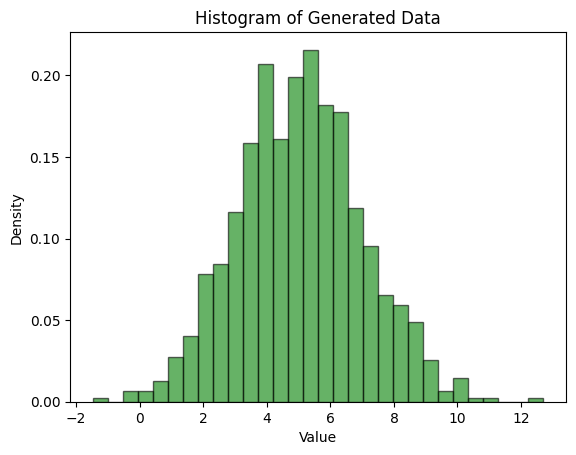

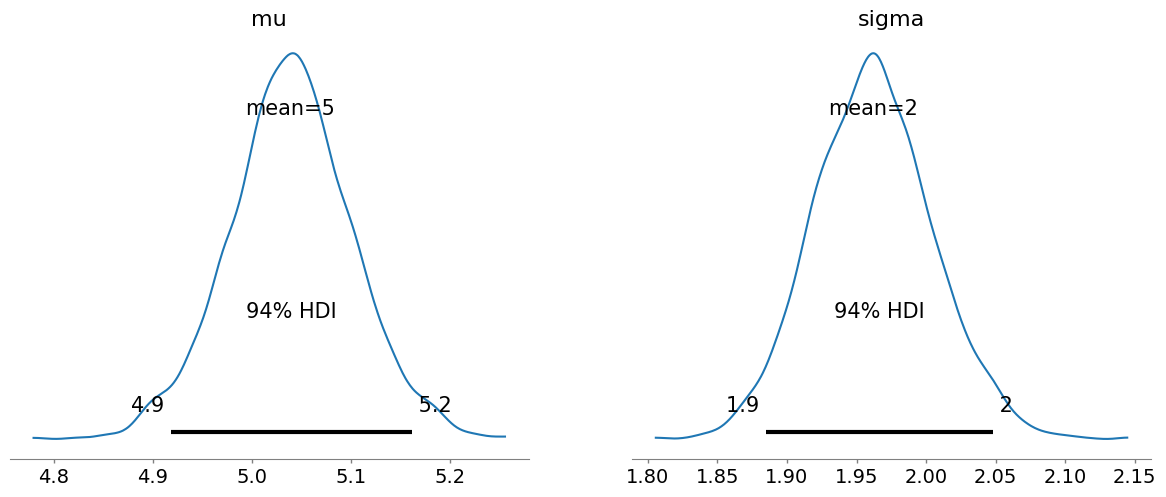

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     5.039  0.063   4.918    5.161      0.001    0.001    3974.0    2584.0   
sigma  1.962  0.043   1.885    2.048      0.001    0.000    4290.0    3020.0   

       r_hat  
mu       1.0  
sigma    1.0  


In [12]:
import pymc as pm
import logging

# Suppress pymc logging
logger = logging.getLogger('pymc')
logger.setLevel(logging.ERROR)

# Generate some data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=1000)

# Plot the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Generated Data')
plt.show()

# Define the Bayesian model
with pm.Model() as model:
    # Prior for the mean (μ)
    mu = pm.Normal('mu', mu=0, sigma=10)
    # Prior for the standard deviation (σ)
    sigma = pm.HalfNormal('sigma', sigma=10)
    # Likelihood (sampling distribution) of the data
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=data)
    
    # Perform MCMC sampling
    with model:
        trace = pm.sample(1000, return_inferencedata=True, progressbar=False)

# Plot the posterior distributions
pm.plot_posterior(trace)
plt.show()

# Summary of the posterior distributions
summary = pm.summary(trace)
print(summary)


**Explanation:**
1. **Generate data:** we generate 100 data points from a normal distribution with a mean of 5 and a standard deviation of 2.
2. **Plot data:** a histogram is plotted to visualize the generated data.
3. **Define the Bayesian model:** ee define a Bayesian model using the PyMC library.
   - The prior distribution for the mean ($\mu$) is set to a normal distribution with mean 0 and standard deviation 10.
   - The prior distribution for the standard deviation ($\sigma$) is set to a half-normal distribution with a standard deviation of 10.
   - The likelihood of the data is modeled as a normal distribution with mean $\mu$ and standard deviation $\sigma$.
4. **Perform MCMC sampling:** e perform MCMC sampling to estimate the posterior distributions of $\mu$ and $\sigma$.
5. **Plot posterior distributions:** the posterior distributions of the parameters are plotted.
6. **Summary of posterior distributions:** a summary of the posterior distributions is printed, showing the estimated parameters and their uncertainties.

Bayesian learning provides a powerful framework for updating beliefs about parameters in light of new data. By combining prior knowledge with observed data through Bayes' theorem, we can obtain a posterior distribution that captures our updated beliefs and uncertainties. Methods like MCMC enable us to estimate the posterior distribution even for complex models, allowing for informed decision-making based on the uncertainty in our estimates.